# (4/4) Recommendation System using CNN

Created by Karishma Prasad 11/09/20 <br />

#### 1. Simple Recommenders
#### 2. Content-based Recommenders
#### 3. Collaborative filtering engines
#### 4. Recommendation System using CNN

## 4. Shoe Recommendations using CNN
Collaborative Filtering is the most common technique used for building an intelligent recommender systems. It learns to give better recommendation as more information about users is collected. <br />

Collaborative filters produces recommendations based on the knowledge of users' attitude to items, that is used to recommend items. 

Websites like Amazon, YouTube, Netflix use collaborative Filtering as a part of their sophisticated recommendation systems. 

#### Definition of Embedding:
It refers to mapping of a discrete / categorical variable to a vector of continuous numbers. In the context of neural network, embeddings are low dimensional , learned continuous vector representations of discrete variables. <br />

* Embeddings map items (eg movies, text) to low dimensional real vectors in a way that similar items are closer to each other. <br />
* Embedding can be applied to dense data (eg audio) to create a meaningful similarity metric <br />
* Jointly embedding diverse data types, to define a similarity between them. 

Neural Network embeddings reduces the dimensionality of the categorical variables and meaningfully represent categorical in the transformed space.

#### Primary purpose of Neural Network Embedding: [4]
1. To find the nearest neighbours in the embedding space. It can be used to make recommendations based on user interets or cluster categories. <br />
2. the mebedding can be used as input to a machine learning model for a supervised task. 
3. Embedding can be used as a visualisation of concepts and relations between the categories.


#### Idea behind this notebook:
1. For the current notebook, Convolutional Neural Network (CNN) model is used to create Shoe Fashion embedding. <br />
2. The embedding is used to identify similar items, this information is then used to recommend similar content in the recommendation system. <br />
3. Embedding is used as input of the model, having reduced dimensionality but with much semantic information. <br />
4. Use of embedding to search for similarity and find similar items using the image


Reference: <br /> 
https://realpython.com/build-recommendation-engine-collaborative-filtering/
https://blog.cambridgespark.com/nowadays-recommender-systems-are-used-to-personalize-your-experience-on-the-web-telling-you-what-120f39b89c3c

https://www.kaggle.com/marlesson/building-a-recommendation-system-using-cnn-v2/data

[4] https://towardsdatascience.com/neural-network-embeddings-explained-4d028e6f0526


### ------------------------------------------------------------------------------
## In this Script:

             Importing Dataset
                  |
                  v
    Defining Functions for plotting using cv2 library
                  |
                  v
      Pre-trained CNN model + Max-pooling 
                  |
                  v
      embedding of each image
                  |
                  V
          cosine_similarity 
                  |
                  v       
          Recommendation based on similarity
### ------------------------------------------------------------------------------

## 1. Importing Dataset

For web-scrapping refer to <br />
https://github.com/kkmlcode/webscraping/blob/master/WebScraping.ipynb

Source of data : <br />
https://www.kaggle.com/paramaggarwal/fashion-product-images-dataset

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # accessing directory structure

#### Checking the files in the path

In [3]:
path = '4_Dataset/'

print(os.listdir(path))

['images', 'images.csv', 'style', 'styles.csv']


<b> Images <b />

In [4]:
# Check the image number
path_images = '4_Dataset/images/'

import os
list_images = []
for file in os.listdir(path_images):
    base = os.path.basename(file)
    splitbase=os.path.splitext(base)
    splitbase = splitbase[0]
    list_images.append(splitbase)
    

# Converting the list to dataframe 
list_images_df = pd.DataFrame(list_images , columns = ['id'])

<b> style folder <b />

In [5]:
path_style = '4_Dataset/style/'


import os
list_style = []
for file in os.listdir(path_style):
    base = os.path.basename(file)
    splitbase=os.path.splitext(base)
    splitbase = splitbase[0]
    list_style.append(splitbase)
    

# Converting the list to dataframe 
list_style_df = pd.DataFrame(list_style, columns = ['id'])

#### Check the indices

In [6]:
import numpy as np
main_list = np.setdiff1d(list_style_df,list_images_df)
# yields the elements in `list_2` that are NOT in `list_1`

In [7]:
print('Number of Files in images',list_images_df.shape)
print('Number of Files in style',list_style_df.shape)

Number of Files in images (1270, 1)
Number of Files in style (1270, 1)


<b> style csv - panadas df </b> <br />
This CSV file is used to create indices for recommendations

In [8]:
df = pd.read_csv(path + "styles.csv", error_bad_lines=False)
df.shape

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

(44424, 10)

In [9]:
# Inner Join
df['id'] = df['id'].astype(int)
list_images_df['id'] = list_images_df['id'].astype(int)

df = df.merge(list_images_df, on = 'id', how = 'inner')

In [10]:
print('Total number of images used:', df.shape[0])

Total number of images used: 1270


Creating a new column 'image' in the df  <br />

row_index (user_input) --> image  --> definition 'image_path' to access that image in that path

In [11]:
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df = df.reset_index(drop=True)
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,2886,Women,Footwear,Shoes,Flats,Brown,Winter,2015.0,Casual,Catwalk Women Leather Brown Flats,2886.jpg
1,3168,Men,Footwear,Shoes,Sports Shoes,White,Fall,2010.0,Sports,Nike Men's Incinerate MSL White Blue Shoe,3168.jpg
2,2872,Women,Footwear,Shoes,Heels,Brown,Winter,2015.0,Casual,Catwalk Women Leather Flats,2872.jpg
3,2618,Women,Footwear,Shoes,Flats,Silver,Spring,2010.0,Casual,Carlton London Women Silver Wedge Sandal,2618.jpg
4,6425,Unisex,Footwear,Shoes,Casual Shoes,Black,Summer,2011.0,Casual,Lotto Unisex Canvas Black Check Shoe,6425.jpg
5,5630,Women,Footwear,Flip Flops,Flip Flops,Blue,Summer,2011.0,Casual,ADIDAS Women's Adi Groove Blue Flip Flop,5630.jpg
6,2627,Women,Footwear,Shoes,Flats,Silver,Fall,2010.0,Casual,Carlton London Women Wedge Silver Sandal,2627.jpg
7,5608,Men,Footwear,Sandal,Sandals,Black,Summer,2011.0,Casual,ADIDAS Men Kendall Black Navy Floater,5608.jpg
8,5896,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2011.0,Casual,Puma Men Cavallino Black Shoe,5896.jpg
9,7399,Men,Footwear,Shoes,Formal Shoes,Black,Winter,2018.0,Formal,Red Tape Men's Black Formal Shoe,7399.jpg


## 2. Defining functions for plotting using cv2 and Plotting Figures
#### Using cv2

#### 1. plot_figures (figures, nrows, ncols, figsize=(8, 8))
        dictionary of figures + nrow + ncol + size of image
                               |
                               v
                 sub plots figures based on nrow x ncol
                 
                 

#### 2. img_path (img)
                        image number
                             |
                             v
                  gives the path of the image (for different applications)
                  
                  
                          
#### 3. load_image (img, resized_fac = 0.1)
                           image read 
                                |
                                v
                           image resize using the resized_fac
                                |
                                v
                            resized_image

In [12]:
import cv2
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional
    

# Gives the path of the chosen image - taken from df / csv file 
# ----------------------------------------------------------------------------    
def img_path(img):
    return path+"/images/"+img


# Loads the image or chosen image using cv2.imread with default flag to colour
# ----------------------------------------------------------------------------
def load_image(img, resized_fac = 0.1):
    img     = cv2.imread(img_path(img))  # cv2.imread(path, flag) -> flag = how the image should be read
    w, h, _ = img.shape                  # returns (rows , columns, channels) -> channel = 3 for BGR
    resized = cv2.resize(img, (int(h*resized_fac), int(w*resized_fac)), interpolation = cv2.INTER_AREA)
    return resized


# Notes 
# =====================================================================
# 1. cv2.resize (Ref: https://pythonexamples.org/python-opencv-cv2-resize-image/)
# ---------------------------------------------------------------------------------
# cv2.resize (src, dsize[, dst[, fx[, fy[, interpolation]]]])
# src -> input image as numpy array
# dsize -> desired size of the output image
# fx -> scaling factor along X-axis or Horizontal axis
# fy -> scaling factor along Y-axis or Horizontal axis
# interpolation - whichb pixel gets which value based on its neighbouring pixel.


#### Testing the functions

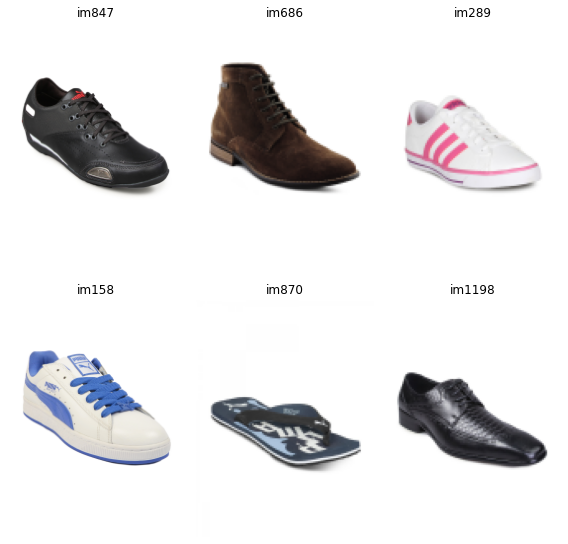

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# generation of a dictionary of (title, images) # choosing random sample of 6
# -------------------------------------------------------------------------------------
figures = {'im'+str(i): load_image(row.image) for i, row in df.sample(6).iterrows()}


# plot of the images in a figure, with 2 rows and 3 columns
# --------------------------------------------------------------------------------------
plot_figures(figures, 2, 3)

# Notes iterrows() Ref: https://cmdlinetips.com/2018/12/how-to-loop-through-pandas-rows-or-how-to-iterate-over-pandas-rows/#:~:text=Pandas%20has%20iterrows()%20function,the%20content%20of%20the%20iterator.
# ---------------------------------------------------------------------------------------
# iterrows -> helps to iterate (or loop through each row)

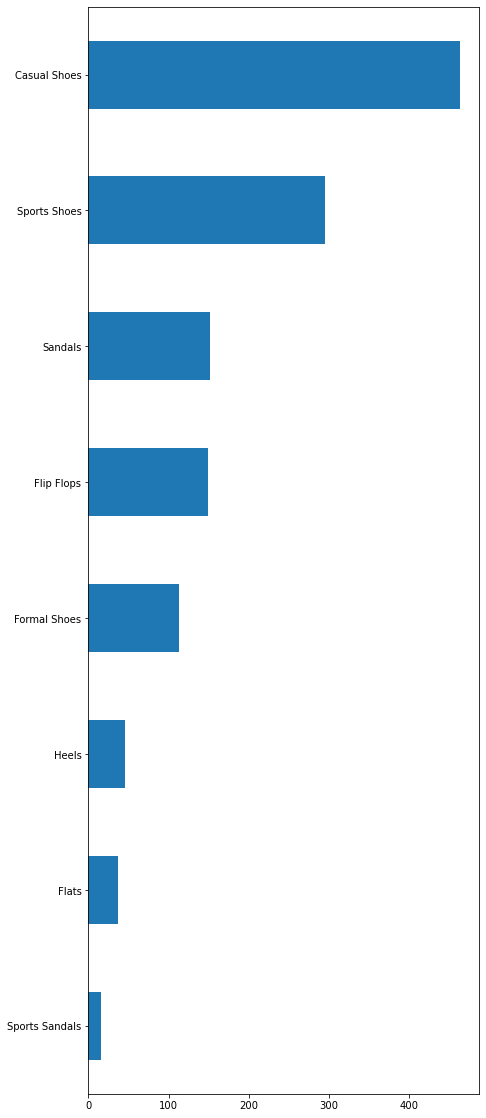

In [14]:
plt.figure(figsize=(7,20))
df.articleType.value_counts().sort_values().plot(kind='barh')

## 3 Use Pre-Trained Model for Recommendation

#### Why is Transfer Learning used :
Deep convolutional network might take days or even weeks to train on a very large dataset. Hence, the idea is to use pre-trainned model that were developed for standard computer-vision benchmarks dataset. <br />

#### What is Transfer Learning :
It refers to a process where model trained for one problem is used in some way for another problem. <br />

#### Advantage of Transfer Learning:
Transfer learning has the benefit of decreasing the training time for a neural network model and can result in lower generalization error.

#### Famous Pre-Trainned Model used:
* VGG (e.g. VGG16 or VGG19)
* GoogLeNet (e.g. InceptionV3)
* Residual Network (e.g. ResNet50) (Used for current project)

Used because of their performance, but also because they were examples that introduced specific architectural innovations, namely consistent and repeating structures (VGG), inception modules (GoogLeNet), and residual modules (ResNet).

<i> Reference: </i> <br />

https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/

In [15]:
import tensorflow as tf
import keras
from keras import Model
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D

#### Model Building 

                ResNet 50 pre trained model 
                           |
                           v
          max pooling layer - reducing the dimensionality
                           |
                           v
                    embedding per image

In [16]:
# Input Shape
img_width, img_height, _ = 224, 224, 3 #load_image(df.iloc[0].image).shape

# Pre-Trained Model
base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape = (img_width, img_height, 3))
base_model.trainable = False

# Add Layer Embedding
model = keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()

# Notes
# Sequential is linear stack of layers 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_max_pooling2d (Global (None, 2048)              0         
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


## 4. Getting Embeddings for each image

<b> get_embedding </b> <br />

                       model + image_name
                               |
                               v
                          image to array (r,col, ch)
                               |
                               v
                         expanding the dimensions 
                               |
                               V
                          preprocess input
                               |
                               V
                   model prediction of pre processed input of image

In [25]:
def get_embedding(model, img_name):
    # Reshape
    img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
    
    # img to Array
    x   = image.img_to_array(img)
    
    # Expand Dim (1, w, h)
    x   = np.expand_dims(x, axis=0) # --> 0 for 1 row
    
    # Pre process Input
    x   = preprocess_input(x)
    
    return model.predict(x).reshape(-1)

# ----- Notes ----------------------------------
# 1. image.img_to_array (image, data_format, dtype)
# 2. The preprocess_input function is meant to adequate your image to the format the model requires. 
#    Some models use images with values ranging from 0 to 1. Others from -1 to +1. 
#    Others use the "caffe" style, that is not normalized, but is centered.

Get Item embedding for first item

In [18]:
emb = get_embedding(model, df.iloc[0].image)
emb.shape

(2048,)

(240, 180, 3)
[ 1.3417058   0.24560714  0.         ...  3.0651584   3.9197583
 16.850603  ]


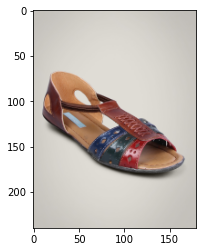

In [19]:
img_array = load_image(df.iloc[0].image)
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
print(img_array.shape)
print(emb)

Get Embedding for all the items in the dataset

In [20]:
%%time
#import swifter

# Parallel apply
df_sample      = df#.sample(10)
map_embeddings = df_sample['image'].apply(lambda img: get_embedding(model, img))
df_embs        = map_embeddings.apply(pd.Series)

print(df_embs.shape)
df_embs.head()

(1270, 2048)
Wall time: 3min 58s


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,1.341706,0.245607,0.000000,0.402125,2.177072,5.861624,11.805331,1.981612,0.0,0.000000,...,2.913576,0.126361,8.807234,0.0,0.319977,12.579874,5.991583,3.065158,3.919758,16.850603
1,2.223169,0.583143,2.240120,1.781045,2.322162,8.172571,12.921416,5.946327,0.0,1.079915,...,0.000000,7.559597,0.000000,0.0,2.680320,20.620777,12.747890,0.977161,3.068939,0.576631
2,3.455007,1.237413,3.087521,2.757453,2.512449,9.276875,10.859390,0.000000,0.0,0.000000,...,0.000000,1.559078,3.187752,0.0,1.953512,6.533890,2.494635,4.837697,7.401317,9.473594
3,3.859962,0.000000,4.097209,0.000000,5.127932,2.072511,3.448499,0.480184,0.0,0.492055,...,0.000000,2.595981,5.441072,0.0,5.463353,8.041458,2.495620,6.262132,1.416566,24.415773
4,0.536299,0.000000,2.341081,0.023103,7.869478,1.306141,8.342985,11.075380,0.0,0.141563,...,0.000000,0.000000,0.522326,0.0,8.180895,16.275612,5.766942,1.053512,3.418533,10.722988


#### Cosine Simililarity

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcule DIstance Matriz
cosine_sim = cosine_similarity(df_embs)
cosine_sim[:4, :4]

array([[0.9999995 , 0.6146005 , 0.78127164, 0.63425976],
       [0.6146005 , 0.9999999 , 0.66347635, 0.6118378 ],
       [0.78127164, 0.66347635, 0.99999976, 0.64943373],
       [0.63425976, 0.6118378 , 0.64943373, 1.0000005 ]], dtype=float32)

## 5. Recommend Similar Items

#### get_recommender ()

                      creating pandas series of indices for tracking
                                       
                                       
                           Input the index of Target
                                       |
                                       V
                        cosine similarity [index]
                                       |
                                       v
                     sorting in decreasing order based on similarity
                                       |
                                       v
                             indices and similarity 
                                       

In [22]:
indices = pd.Series(range(len(df)), index=df.index)
indices

# Function that get movie recommendations based on the cosine similarity score of movie genres
def get_recommender(idx, df, top_n = 5):
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    
    return indices.iloc[idx_rec].index, idx_sim

# Example
get_recommender(145, df, top_n = 5)

(Int64Index([677, 1196, 1237, 727, 7], dtype='int64'),
 [0.7924359, 0.77137506, 0.76789564, 0.75878316, 0.75548804])

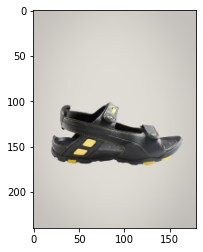

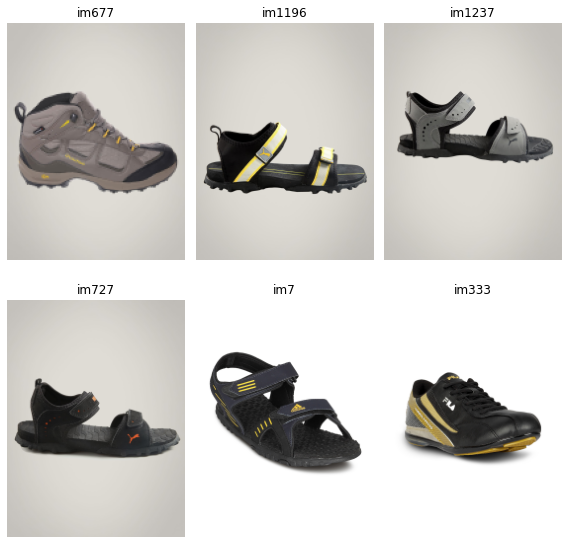

In [23]:
# Idx Item to Recommender
idx_ref = 145

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))


# generation of a dictionary of (title, images)
# ------------------------------------------------------------------------------------
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

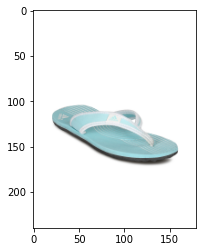

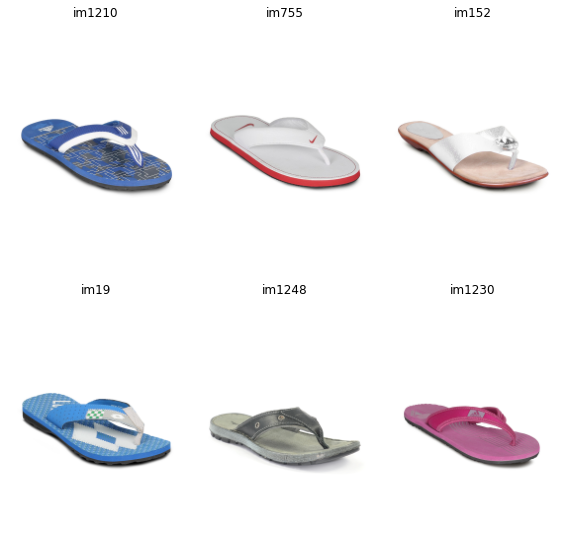

In [24]:
# Idx Item to Recommender
idx_ref = 5

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

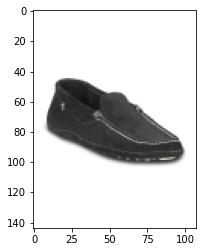

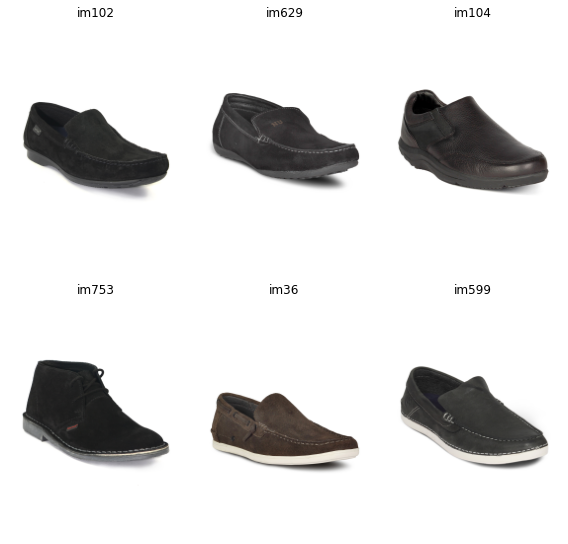

In [26]:
# Idx Item to Recommender
idx_ref = 8

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

In [ ]:
# Idx Item to Recommender
idx_ref = 30

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

In [ ]:
# Idx Item to Recommender
idx_ref = 33

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

In [ ]:
# Idx Item to Recommender
idx_ref = 41

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

In [ ]:
# Idx Item to Recommender
idx_ref = 50

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

In [ ]:
# Idx Item to Recommender
idx_ref = 58

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

In [ ]:
# Idx Item to Recommender
idx_ref = 71

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)